<a href="https://colab.research.google.com/github/RodrigoLarroca/PortFolio/blob/main/Hipotecario_prediccion_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediccion en credito hipotecario**

Declaración del problema :
Acerca de la empresa La empresa
Dream Housing Finance se ocupa de todos los préstamos hipotecarios. Tienen presencia en todas las áreas urbanas, semiurbanas y rurales. El cliente primero solicita un préstamo hipotecario después de que la compañía valida la elegibilidad del cliente para un préstamo.

Problema
La empresa desea automatizar el proceso de elegibilidad del préstamo (en tiempo real) en función de los detalles del cliente proporcionados al completar el formulario de solicitud en línea. Estos detalles son Género, Estado Civil, Educación, Número de Dependientes, Ingresos, Monto del Préstamo, Historial de Crédito y otros. Para automatizar este proceso, han dado un problema para identificar los segmentos de clientes elegibles para los montos de los préstamos para apuntar específicamente a estos clientes. Aquí han proporcionado un conjunto de datos parcial.

Kaggle: https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

# **Instalacion, librerias, dataset**

In [60]:
!pip install lazypredict;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm
from collections import Counter
from lazypredict.Supervised import LazyClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
hipoteca1 = data = pd.read_csv('loan_sanction_train.csv')
pd.options.display.max_columns = None
hipoteca1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.00,267.00,360.00,1.00,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.00,95.00,360.00,1.00,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.00,158.00,360.00,0.00,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.00,168.00,360.00,1.00,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.00,349.00,360.00,1.00,Semiurban,N


In [62]:
hipoteca2 = data = pd.read_csv('loan_sanction_test.csv')
pd.options.display.max_columns = None
hipoteca2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.00,360.00,1.00,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.00,360.00,1.00,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.00,360.00,0.00,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.00,240.00,1.00,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.00,360.00,1.00,Semiurban


In [63]:
print(hipoteca1.shape)
print(hipoteca2.shape)

(614, 13)
(367, 12)


# **Wrangling y EDA**

In [9]:
df1=pd.DataFrame(hipoteca1)
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [10]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(614, 13)

In [11]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df1=df1.dropna()
df1.shape

(480, 13)

Obtenemos los datos en numericos, para poder trabajar en predicciones de manera mas comoda.

In [13]:
df1['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df1['Gender'] = df1['Gender'].astype(int)

df1['Married'].replace({'No': 0, 'Yes': 1}, inplace=True)
df1['Married'] = df1['Married'].astype(int)

df1['Dependents'].replace({'3+': 3}, inplace=True)
df1['Dependents'] = df1['Dependents'].astype(int)

df1['Education'].replace({'Not Graduate': 0, 'Graduate': 1}, inplace=True)
df1['Education'] = df1['Education'].astype(int)

df1['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace=True)
df1['Self_Employed'] = df1['Self_Employed'].astype(int)

df1['Credit_History'] = df1['Credit_History'].astype(int)

df1['Property_Area'].replace({'Urban': 0, 'Semiurban': 1,'Rural':2}, inplace=True)
df1['Property_Area'] = df1['Property_Area'].astype(int)

df1['Loan_Status'].replace({'Y': 0, 'N': 1}, inplace=True)
df1['Loan_Status'] = df1['Loan_Status'].astype(int)

In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,480.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
Married,480.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Dependents,480.00,0.78,1.02,0.00,0.00,0.00,2.00,3.00
Education,480.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
Self_Employed,480.00,0.14,0.34,0.00,0.00,0.00,0.00,1.00
ApplicantIncome,480.00,5364.23,5668.25,150.00,2898.75,3859.00,5852.50,81000.00
CoapplicantIncome,480.00,1581.09,2617.69,0.00,0.00,1084.50,2253.25,33837.00
LoanAmount,480.00,144.74,80.51,9.00,100.00,128.00,170.00,600.00
Loan_Amount_Term,480.00,342.05,65.21,36.00,360.00,360.00,360.00,480.00
Credit_History,480.00,0.85,0.35,0.00,1.00,1.00,1.00,1.00


La variable "Género" tiene una media de 0,18 y una desviación estándar de 0,38. Esto sugiere que la mayoría de las observaciones (alrededor del 82%) son probablemente de hombres, con una pequeña proporción de observaciones de mujeres.

La variable "Casados" tiene una media de 0,65, lo que indica que la mayoría de las observaciones son casados.

"Dependientes" tiene una media de 0,78, con una desviación estándar de 1,02. Esto sugiere que la mayoría de las observaciones tienen algunos dependientes, con un rango de 0 a 3 dependientes.

La variable “Educación” tiene una media de 0,80, lo que indica que la mayoría de las observaciones han realizado un posgrado.

La variable "Autoempleado" tiene una media de 0,14, lo que sugiere que la mayoría de las observaciones no son autónomos.

La variable "SolicitanteIngreso" tiene una media de 5364,23 y una desviación estándar de 5668,25. Esto sugiere una amplia gama de valores de ingresos entre las observaciones, con un mínimo de 150 y un máximo de 81000.

La variable "CoapplicantIncome" tiene una media de 1581,09 y una desviación estándar de 2617,69. Esto sugiere que la mayoría de las observaciones tienen algún ingreso de cosolicitante, con un rango de 0 a 33837.

La variable "LoanAmount" tiene una media de 144,74 y una desviación estándar de 80,51. Esto sugiere una amplia gama de montos de préstamo entre las observaciones, con un mínimo de 9 y un máximo de 600.

La variable "Loan_Amount_Term" tiene una media de 342,05 y una desviación estándar de 65,21. Esto sugiere que la mayoría de los préstamos tienen un plazo de 360 ​​meses, con un rango de 36 a 480 meses.

La variable “Credit_History” tiene una media de 0,85, lo que indica que la mayoría de las observaciones tienen un historial crediticio positivo.

La variable "Property_Area" tiene una media de 0,98 y una desviación estándar de 0,78. Esto sugiere que la mayoría de las propiedades se encuentran en una zona urbana, con un rango de 0 a 2 para zonas rurales, semiurbanas y urbanas.

La variable "Loan_Status" tiene una media de 0,31, lo que sugiere que alrededor del 31% de los préstamos han sido aprobados.

In [15]:
df1.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.00,128.00,360.00,1,2,1


#EDA **Outliers**

In [16]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
def detect_outliers(df1,n,features):

  outlier_indices = []
  for col in features:
      #25%
      Q1 = np.percentile(df1[col], 25)
      #75%
      Q3 = np.percentile(df1[col],75)
      #IQR
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      outlier_list_col = df1[(df1[col] < Q1 - outlier_step) | (df1[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_list_col)
        
    #observaciones con más de 2 valores atípicos
  outlier_indices = Counter(outlier_indices)        
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers   
      #Outliers
Outliers_IQR = detect_outliers(df1,2,[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])
      #Drop outliers
df_out1 = df1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Eliminamos los outliers, en este analisis no se tienen en cuenta.

In [18]:
print(df1.shape)
print(df_out1.shape)

(480, 13)
(445, 13)


In [19]:
print('Cantidad de creditos aprobados antes de descartar valores atípicos: ', len(df1[df1['Loan_Status'] == 0 ]),'en porcentaje:', round(df1['Loan_Status'].value_counts()[0]/len(df1) * 100,2), '%')
print('Cantidad de creditos denegados antes de descartar valores atípicos: ', len(df1[df1['Loan_Status'] == 1 ]),'en porcentaje:', round(df1['Loan_Status'].value_counts()[1]/len(df1) * 100,2), '%')

Cantidad de creditos aprobados antes de descartar valores atípicos:  332 en porcentaje: 69.17 %
Cantidad de creditos denegados antes de descartar valores atípicos:  148 en porcentaje: 30.83 %


In [20]:
print('Cantidad de creditos aprobados despues de descartar valores atípicos: ', len(df_out1[df_out1['Loan_Status'] == 0 ]),'en porcentaje:', round(df_out1['Loan_Status'].value_counts()[0]/len(df1) * 100,2), '%')
print('Cantidad de creditos denegados despues de descartar valores atípicos: ', len(df_out1[df_out1['Loan_Status'] == 1 ]),'en porcentaje:', round(df_out1['Loan_Status'].value_counts()[1]/len(df1) * 100,2), '%')

Cantidad de creditos aprobados despues de descartar valores atípicos:  319 en porcentaje: 66.46 %
Cantidad de creditos denegados despues de descartar valores atípicos:  126 en porcentaje: 26.25 %


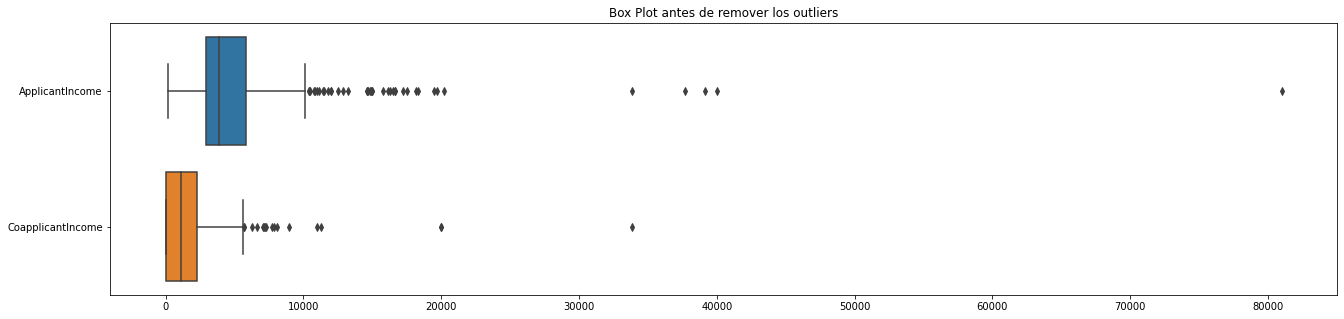

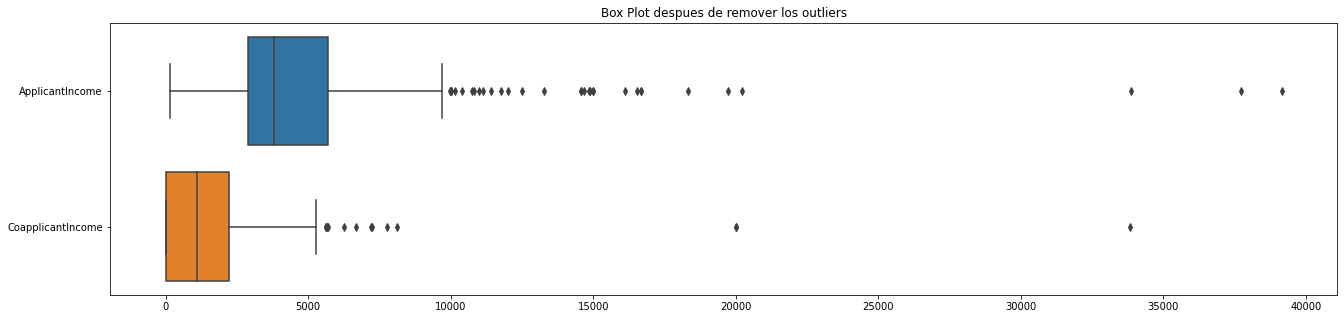

In [21]:
df_reviews = df1[['ApplicantIncome', 'CoapplicantIncome']]
df_reviews_out1 = df_out1[['ApplicantIncome', 'CoapplicantIncome']]

plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews, orient="h")
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews_out1, orient="h")
plt.title("Box Plot despues de remover los outliers")
plt.show()

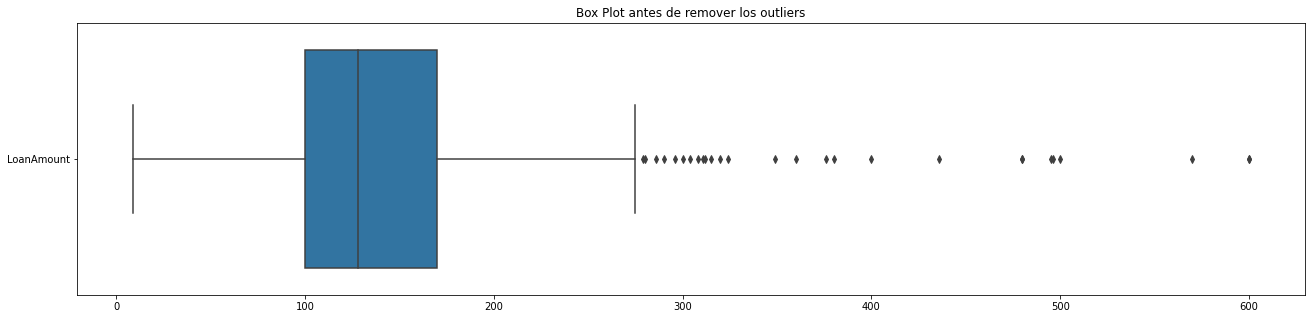

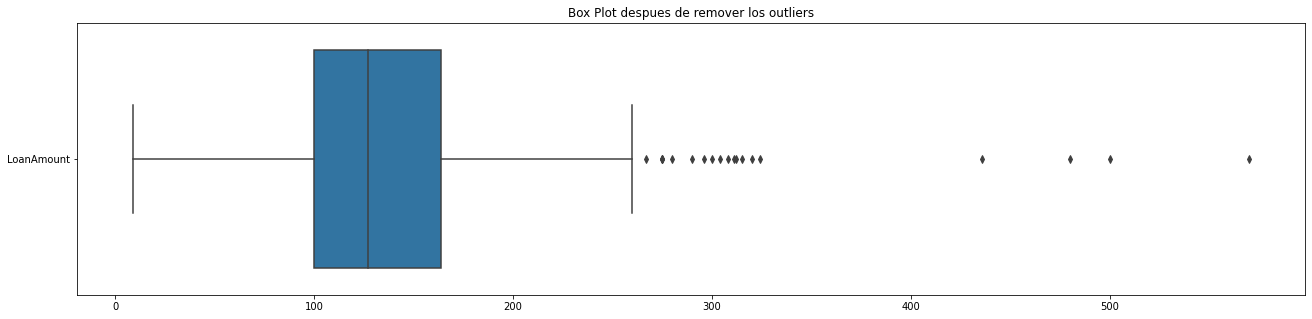

In [22]:
df_reviews1 = df1[['LoanAmount']]
df_reviews_out2 = df_out1[['LoanAmount']]

plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews1, orient="h")
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews_out2, orient="h")
plt.title("Box Plot despues de remover los outliers")
plt.show()

#EDA **Loan_Status**

Text(0.5, 1.0, 'Loan_Status y ApplicantIncome')

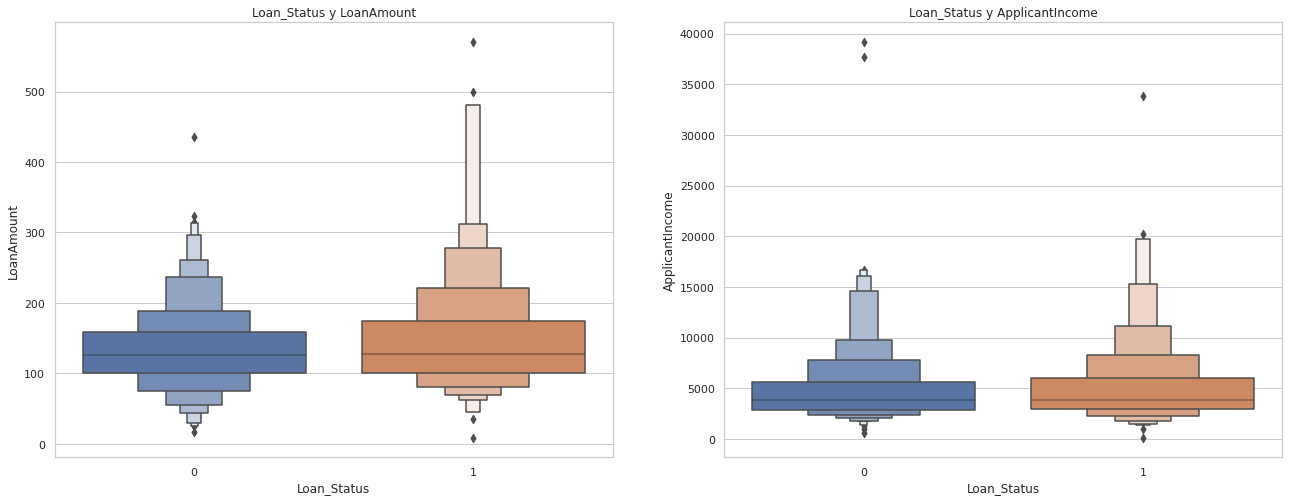

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(22, 8))
sns.boxenplot(data=df_out1, x="Loan_Status", y="LoanAmount", k_depth="trustworthy",ax=axs[0])
axs[0].set_title('Loan_Status y LoanAmount')
sns.boxenplot(data=df_out1, x="Loan_Status", y="ApplicantIncome", k_depth="trustworthy",ax=axs[1])
axs[1].set_title('Loan_Status y ApplicantIncome')

In [31]:
df_Apro = df_out1[df_out1['Loan_Status'] == 0]
df_Canc = df_out1[df_out1['Loan_Status'] == 1]

In [32]:
df_Apro.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001005,0,1,0,1,1,3000,0.00,66.00,360.00,1,0,0


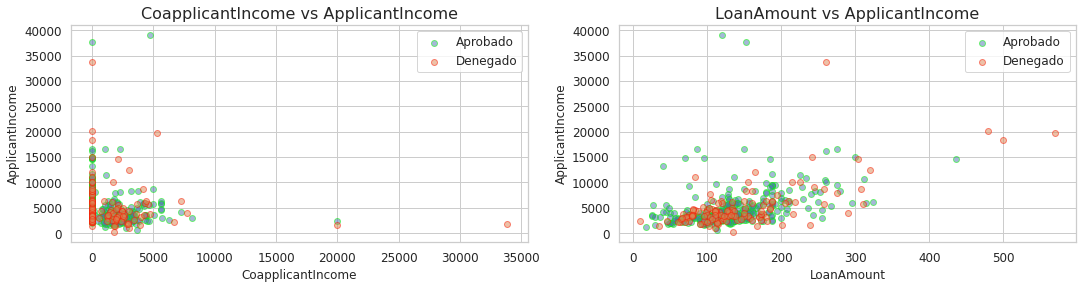

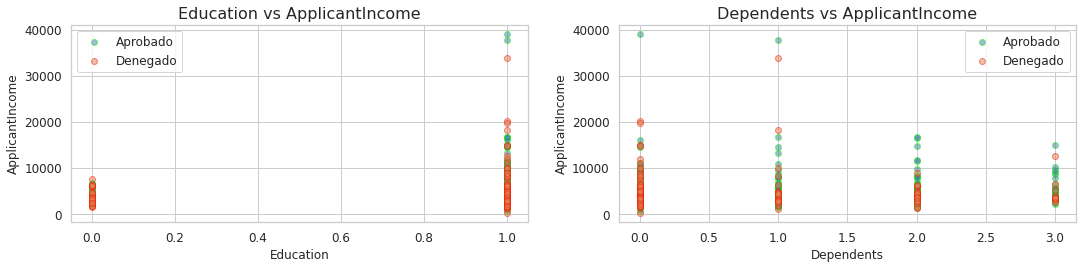

In [33]:
#CoapplicantIncome y ApplicantIncome
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_Apro['CoapplicantIncome'], df_Apro['ApplicantIncome'], edgecolor='#04F801', alpha=0.5, label= 'Aprobado')
plt.scatter(df_Canc['CoapplicantIncome'], df_Canc['ApplicantIncome'], edgecolor='#F81B01', alpha=0.5, label= 'Denegado')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('CoapplicantIncome', fontsize=12)
plt.title('CoapplicantIncome vs ApplicantIncome', fontsize=16);

#LoanAmount y ApplicantIncome
plt.subplot(122)
plt.scatter(df_Apro['LoanAmount'], df_Apro['ApplicantIncome'], edgecolor='#04F801', alpha=0.5, label= 'Aprobado')
plt.scatter(df_Canc['LoanAmount'], df_Canc['ApplicantIncome'], edgecolor='#F81B01', alpha=0.5, label= 'Denegado')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('LoanAmount', fontsize=12)
plt.title('LoanAmount vs ApplicantIncome', fontsize=16);

#Education y ApplicantIncome
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_Apro['Education'], df_Apro['ApplicantIncome'], edgecolor='#04F801', alpha=0.5, label= 'Aprobado')
plt.scatter(df_Canc['Education'], df_Canc['ApplicantIncome'], edgecolor='#F81B01', alpha=0.5, label= 'Denegado')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Education vs ApplicantIncome', fontsize=16)

#Dependents y ApplicantIncome
plt.subplot(222)
plt.scatter(df_Apro['Dependents'], df_Apro['ApplicantIncome'], edgecolor='#04F801', alpha=0.5, label= 'Aprobado')
plt.scatter(df_Canc['Dependents'], df_Canc['ApplicantIncome'], edgecolor='#F81B01', alpha=0.5, label= 'Denegado')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Dependents', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Dependents vs ApplicantIncome', fontsize=16)
plt.show()

Posibles relaciones a priori:
Coapplicant income mayor -> mayor aprobados.
Loan amount medio aprobado entre 50 y 200k.
Podria verse minimamente un porcentaje mayor de aprobados con educacion de grado.
En general a mayor dependientes, mayores aprobados?

# Pre seleccion de modelo **Lazy pred**

In [37]:
X = df_out1.drop(columns = ['Loan_Status','Loan_ID'])     # feature matrix
y = df_out1['Loan_Status']                      # target feature
df_out1.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,1,1,1,0,4583,1508.00,128.00,360.00,1,2,1


In [38]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
models, predictions = LazyClassifier().fit(X_train, X_test, y_train, y_test)
print(models[:10])

100%|██████████| 29/29 [00:01<00:00, 27.56it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.76               0.72     0.72      0.76   
GaussianNB                         0.79               0.71     0.71      0.76   
XGBClassifier                      0.79               0.71     0.71      0.76   
BaggingClassifier                  0.78               0.71     0.71      0.76   
LGBMClassifier                     0.79               0.70     0.70      0.76   
RandomForestClassifier             0.76               0.69     0.69      0.74   
SVC                                0.78               0.69     0.69      0.74   
KNeighborsClassifier               0.76               0.69     0.69      0.74   
AdaBoostClassifier                 0.75               0.68     0.68      0.73   
QuadraticDiscriminantAnalysis      0.75               0.68     0.68      0.73   

                           

[(0.0, 1.0)]

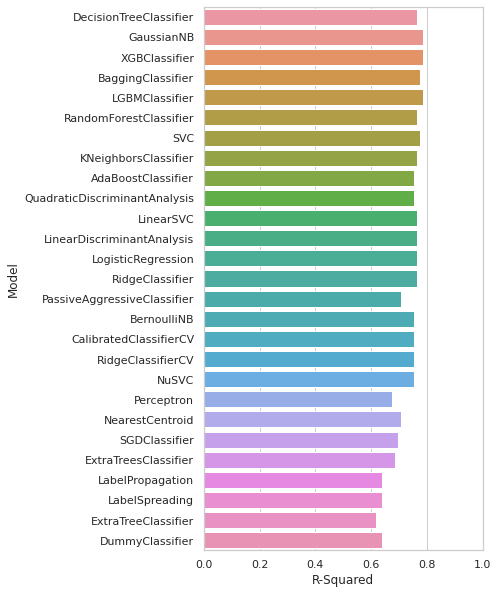

In [39]:
predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

Se realizara un modelo prodictivo con XGBoost de la variables loan_status

#Modelo y analisis **XGBoost**

In [40]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
df_out1=df_out1[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History'	,'Property_Area'	,'Loan_Status']]
df_out1.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.00,128.00,360.00,1,2,1


In [43]:
agar_train, agar_test = train_test_split(df_out1, test_size=.3, random_state=1999)
agar_train_mat = xgb.DMatrix(agar_train.drop("Loan_Status", 1), label=agar_train["Loan_Status"])
agar_test_mat = xgb.DMatrix(agar_test.drop("Loan_Status", 1), label=agar_test["Loan_Status"])

In [44]:
print(agar_train.shape)
print(agar_test.shape)
agar_train_mat

(311, 12)
(134, 12)


In [45]:
parametros = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":2}
rondas = 10
evaluacion = [(agar_test_mat, "eval"), (agar_train_mat, "train")]

In [46]:
modelo = xgb.train(parametros, agar_train_mat, rondas, evaluacion)
modelo

[0]	eval-error:0.208955	train-error:0.186495
[1]	eval-error:0.19403	train-error:0.196141
[2]	eval-error:0.19403	train-error:0.196141
[3]	eval-error:0.19403	train-error:0.192926
[4]	eval-error:0.19403	train-error:0.192926
[5]	eval-error:0.19403	train-error:0.196141
[6]	eval-error:0.19403	train-error:0.192926
[7]	eval-error:0.19403	train-error:0.192926
[8]	eval-error:0.19403	train-error:0.192926
[9]	eval-error:0.19403	train-error:0.189711


In [47]:
prediccion = modelo.predict(agar_test_mat)
prediccion = [1 if i > .5 else 0 for i in prediccion]
prediccion[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [48]:
def metricas(objetivo, prediccion):
    matriz_conf = confusion_matrix(objetivo, prediccion)
    score = accuracy_score(objetivo, prediccion)
    reporte = classification_report(objetivo, prediccion)
    metricas = [matriz_conf, score, reporte]
    return(metricas)
metricas = metricas(agar_test["Loan_Status"], prediccion)
[print(i) for i in metricas]

[[98  1]
 [25 10]]
0.8059701492537313
              precision    recall  f1-score   support

           0       0.80      0.99      0.88        99
           1       0.91      0.29      0.43        35

    accuracy                           0.81       134
   macro avg       0.85      0.64      0.66       134
weighted avg       0.83      0.81      0.77       134



[None, None, None]

La matriz muestra que hubo 98 verdaderos negativos y 10 verdaderos positivos, 25 falsos negativos y 1 falso positivo.

La precisión es 0,8059701492537313, que es la proporción de predicciones correctas (TP + TN) con respecto al número total de predicciones.

La precisión, recuperación, puntaje f1 y soporte se calculan utilizando las siguientes fórmulas:

Precisión = TP / (TP + FP)
Recuperar = TP / (TP + FN)
Puntuación F1 = 2 * Precisión * Recuperación / (Precisión + Recuperación)
Soporte = Número de observaciones para cada clase
La precisión para la clase 0 (no aprobada) es 0,80 y para la clase 1 (aprobada) es 0,91, lo que indica que el modelo es bueno para predecir casos positivos pero no tan bueno para predecir casos negativos.

El recuerdo para la clase 0 es 0,99 y para la clase 1 es 0,29, lo que indica que el modelo tiene una buena capacidad para identificar los verdaderos negativos pero una baja capacidad para identificar los verdaderos positivos.

La puntuación f1 es 0,88 para la clase 0 y 0,43 para la clase 1, lo que refleja el equilibrio entre precisión y recuperación.

**Segundo modelo XGBoost, ¿obteniendo mejores resultados?**

In [49]:
parametros_02 = {"booster":"gbtree", "max_depth": 4, "eta": .3, "objective": "binary:logistic", "nthread":2}
rondas_02 = 100
modelo_02 = xgb.train(parametros_02, agar_test_mat, rondas_02, evaluacion, early_stopping_rounds=10)

[0]	eval-error:0.149254	train-error:0.237942
Multiple eval metrics have been passed: 'train-error' will be used for early stopping.

Will train until train-error hasn't improved in 10 rounds.
[1]	eval-error:0.164179	train-error:0.215434
[2]	eval-error:0.164179	train-error:0.215434
[3]	eval-error:0.141791	train-error:0.221865
[4]	eval-error:0.149254	train-error:0.215434
[5]	eval-error:0.126866	train-error:0.209003
[6]	eval-error:0.104478	train-error:0.21865
[7]	eval-error:0.089552	train-error:0.228296
[8]	eval-error:0.08209	train-error:0.228296
[9]	eval-error:0.089552	train-error:0.221865
[10]	eval-error:0.067164	train-error:0.215434
[11]	eval-error:0.059701	train-error:0.221865
[12]	eval-error:0.052239	train-error:0.237942
[13]	eval-error:0.052239	train-error:0.228296
[14]	eval-error:0.052239	train-error:0.241158
[15]	eval-error:0.037313	train-error:0.241158
Stopping. Best iteration:
[5]	eval-error:0.126866	train-error:0.209003



In [50]:
def metricas(objetivo, prediccion):
    matriz_conf = confusion_matrix(objetivo, prediccion)
    score = accuracy_score(objetivo, prediccion)
    reporte = classification_report(objetivo, prediccion)
    metricas = [matriz_conf, score, reporte]
    return(metricas)
prediccion_02 = modelo_02.predict(agar_test_mat)
prediccion_02 = [1 if i > .5 else 0 for i in prediccion_02]
metricas_02 = metricas(agar_test["Loan_Status"], prediccion_02)
[print(i) for i in metricas_02]

[[98  1]
 [ 4 31]]
0.9626865671641791
              precision    recall  f1-score   support

           0       0.96      0.99      0.98        99
           1       0.97      0.89      0.93        35

    accuracy                           0.96       134
   macro avg       0.96      0.94      0.95       134
weighted avg       0.96      0.96      0.96       134



[None, None, None]

La matriz muestra que hubo 98 verdaderos negativos y 31 verdaderos positivos, 4 falsos negativos y 1 falso positivo.

La precisión es de 0,9626865671641791, lo que indica que el modelo tiene una alta capacidad para hacer predicciones correctas.

La precisión para la clase 0 (no aprobada) es 0,96 y para la clase 1 (aprobada) es 0,97, lo que indica que el modelo es bueno para predecir casos positivos y negativos.

El recuerdo para la clase 0 es 0,99 y para la clase 1 es 0,89, lo que indica que el modelo tiene una gran capacidad para identificar tanto los verdaderos negativos como los verdaderos positivos.

La puntuación f1 es 0,98 para la clase 0 y 0,93 para la clase 1, lo que refleja un buen equilibrio entre precisión y recuperación para ambas clases.

La exactitud, precisión, recuperación y puntaje f1 se informan como un promedio ponderado basado en el respaldo de cada clase, lo que indica el número de observaciones para cada clase.

En conclusión, esta matriz de confusión sugiere que el modelo tiene una alta precisión general y una buena capacidad para predecir casos positivos y negativos con alta precisión y recuperación, lo que lo convierte en un buen modelo para este problema de clasificación binaria.

In [51]:
modelo_02.save_model("modelo_02.model")

# **Prueba con dataset nuevo**

In [108]:
modelo_importado = xgb.Booster()
modelo_importado.load_model("modelo_02.model")

In [109]:
hipoteca2=pd.DataFrame(hipoteca2)
hipoteca2.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_predict
0,0.00,1,0.00,1,0.00,5720,0,110.00,360.00,1.00,0,0
1,0.00,1,1.00,1,0.00,3076,1500,126.00,360.00,1.00,0,0
2,0.00,1,2.00,1,0.00,5000,1800,208.00,360.00,1.00,0,0
4,0.00,0,0.00,0,0.00,3276,0,78.00,360.00,1.00,0,1
5,0.00,1,0.00,0,1.00,2165,3422,152.00,360.00,1.00,0,0


Paso datos a numerico

In [110]:
hipoteca2=hipoteca2.dropna()

hipoteca2['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)

hipoteca2['Married'].replace({'No': 0, 'Yes': 1}, inplace=True)
hipoteca2['Married'] = hipoteca2['Married'].astype(int)

hipoteca2['Dependents'].replace({'3+': 3}, inplace=True)
hipoteca2['Dependents'] = hipoteca2['Dependents'].astype(float)


hipoteca2['Education'].replace({'Not Graduate': 0, 'Graduate': 1}, inplace=True)
hipoteca2['Education'] = hipoteca2['Education'].astype(int)

hipoteca2['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace=True)


hipoteca2['Property_Area'].replace({'Urban': 0, 'Semiurban': 1,'Rural':2}, inplace=True)
hipoteca2['Property_Area'] = hipoteca2['Property_Area'].astype(int)

hipoteca2=hipoteca2[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History'	,'Property_Area']]
hipoteca2.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.00,1,0.00,1,0.00,5720,0,110.00,360.00,1.00,0
1,0.00,1,1.00,1,0.00,3076,1500,126.00,360.00,1.00,0
2,0.00,1,2.00,1,0.00,5000,1800,208.00,360.00,1.00,0
4,0.00,0,0.00,0,0.00,3276,0,78.00,360.00,1.00,0
5,0.00,1,0.00,0,1.00,2165,3422,152.00,360.00,1.00,0


In [111]:
hipoteca2.info()
hipoteca2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             289 non-null    float64
 1   Married            289 non-null    int64  
 2   Dependents         289 non-null    float64
 3   Education          289 non-null    int64  
 4   Self_Employed      289 non-null    float64
 5   ApplicantIncome    289 non-null    int64  
 6   CoapplicantIncome  289 non-null    int64  
 7   LoanAmount         289 non-null    float64
 8   Loan_Amount_Term   289 non-null    float64
 9   Credit_History     289 non-null    float64
 10  Property_Area      289 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 27.1 KB


(289, 11)

Uso el modelo para predecir en base a estos datos nuevos

In [112]:
test_matrix = hipoteca2.values
feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
test_dmatrix = xgb.DMatrix(data=test_matrix, feature_names=feature_names)
predictions = modelo_importado.predict(test_dmatrix)

In [113]:
hipoteca2['Loan_Status_predict'] = predictions_labels
hipoteca2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_predict
0,0.00,1,0.00,1,0.00,5720,0,110.00,360.00,1.00,0,0
1,0.00,1,1.00,1,0.00,3076,1500,126.00,360.00,1.00,0,0
2,0.00,1,2.00,1,0.00,5000,1800,208.00,360.00,1.00,0,0
4,0.00,0,0.00,0,0.00,3276,0,78.00,360.00,1.00,0,1
5,0.00,1,0.00,0,1.00,2165,3422,152.00,360.00,1.00,0,0


Funciona, ahora vuelvo los valores numericos a texto para visualizar mejor los resultados

In [124]:
modelofull=hipoteca2[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History'	,'Property_Area','Loan_Status_predict']]
modelofull['Gender'].replace({0: 'Male',  1: 'Female'}, inplace=True)

modelofull['Married'].replace({ 0:'No', 1:'Yes'}, inplace=True)

modelofull['Education'].replace({ 0:'Not Graduate',  1:'Graduate'}, inplace=True)

modelofull['Self_Employed'].replace({ 0:'No',  1:'Yes'}, inplace=True)

modelofull['Property_Area'].replace({ 0:'Urban',  1:'Semiurban',2:'Rural'}, inplace=True)

modelofull['Loan_Status_predict'].replace({ 0:'No aprobado',  1:'Aprobado'}, inplace=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
modelofull.head(289)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_predict
0,Male,Yes,0.00,Graduate,No,5720,0,110.00,360.00,1.00,Urban,No aprobado
1,Male,Yes,1.00,Graduate,No,3076,1500,126.00,360.00,1.00,Urban,No aprobado
2,Male,Yes,2.00,Graduate,No,5000,1800,208.00,360.00,1.00,Urban,No aprobado
4,Male,No,0.00,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban,Aprobado
5,Male,Yes,0.00,Not Graduate,Yes,2165,3422,152.00,360.00,1.00,Urban,No aprobado
6,Female,No,1.00,Not Graduate,No,2226,0,59.00,360.00,1.00,Semiurban,No aprobado
7,Male,Yes,2.00,Not Graduate,No,3881,0,147.00,360.00,0.00,Rural,Aprobado
9,Male,No,0.00,Not Graduate,No,2400,2400,123.00,360.00,1.00,Semiurban,No aprobado
10,Male,No,0.00,Not Graduate,No,3091,0,90.00,360.00,1.00,Urban,Aprobado
14,Female,No,0.00,Graduate,No,4666,0,124.00,360.00,1.00,Semiurban,No aprobado
